# Data inputting

In [1]:
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

#Importing data
import glob 
csv_files = glob.glob('/Users/LBJ/Desktop/6080_Data/M4-6/*.csv')

df = pd.DataFrame()
for file in csv_files:
    data = pd.read_csv(file)
    df = df.append(data, ignore_index=True)

/var/folders/cd/c6l6k8q13qd_5vxs3_m7jkpr0000gp/T/ipykernel_29162/2981460401.py:12: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)
/var/folders/cd/c6l6k8q13qd_5vxs3_m7jkpr0000gp/T/ipykernel_29162/2981460401.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
/var/folders/cd/c6l6k8q13qd_5vxs3_m7jkpr0000gp/T/ipykernel_29162/2981460401.py:12: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)
/var/folders/cd/c6l6k8q13qd_5vxs3_m7jkpr0000gp/T/ipykernel_29162/2981460401.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
/var/folders/cd/c6l6k8q13qd_5vxs3_m7jkpr0000gp/T/ipykernel_29162

In [2]:
df.head()
# negative and positive 
# goal - NLP technqiues 
# goal - shorten the sentence

# prediction and clustering - yes

,AssetId,organizationid,organizationcountrycode,locationid,AssetType,AlarmLabel,AlarmMessage,Severity,ActivatedTimestamp,ClearedTimestamp,month,week
0,001a968a-ea9c-44c3-8fb1-f6977bef2f8a,8336ef8a-c468-4864-ae59-d0a7c6050fe1,US,NaN,RPDU,Maintenance Mode Alarm,Notifications were disabled for maintenance; but are now enabled.,INFO,2021-06-11T20:09:26Z,2021-06-11T20:23:52Z,6,24
1,001a968a-ea9c-44c3-8fb1-f6977bef2f8a,8336ef8a-c468-4864-ae59-d0a7c6050fe1,US,NaN,RPDU,Maintenance Mode Alarm,Notifications were disabled for maintenance; but are now enabled.,INFO,2021-06-11T20:24:50Z,2021-06-14T14:45:21Z,6,24
2,001e6d91-324b-4b99-84f8-9435148de9ce,5effecae-fdee-494a-bf38-d4cb5d7cc405,US,NaN,UPS,Power Failure Cleared,No longer on battery power.,WARNING,2021-06-04T11:06:14Z,2021-06-04T11:06:32Z,6,23
3,001e6d91-324b-4b99-84f8-9435148de9ce,5effecae-fdee-494a-bf38-d4cb5d7cc405,US,NaN,UPS,Device Communication Alert,"Communication with the UPS \""redact\"" has been restored.",CRITICAL,2021-06-26T14:23:23Z,2021-06-26T14:28:32Z,6,26
4,001e6d91-324b-4b99-84f8-9435148de9ce,5effecae-fdee-494a-bf38-d4cb5d7cc405,US,NaN,UPS,Power Failure Cleared,No longer on battery power.,WARNING,2021-06-13T11:33:02Z,2021-06-13T11:33:17Z,6,24


In [3]:
# Check the structure of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19105377 entries, 0 to 19105376
Data columns (total 12 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   AssetId                  object
 1   organizationid           object
 2   organizationcountrycode  object
 3   locationid               object
 4   AssetType                object
 5   AlarmLabel               object
 6   AlarmMessage             object
 7   Severity                 object
 8   ActivatedTimestamp       object
 9   ClearedTimestamp         object
 10  month                    int64 
 11  week                     int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ GB
None


In [4]:
df['ActivatedTimestamp'] = pd.to_datetime(df['ActivatedTimestamp'])
df['ClearedTimestamp'] = pd.to_datetime(df['ClearedTimestamp'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19105377 entries, 0 to 19105376
Data columns (total 12 columns):
 #   Column                   Dtype              
---  ------                   -----              
 0   AssetId                  object             
 1   organizationid           object             
 2   organizationcountrycode  object             
 3   locationid               object             
 4   AssetType                object             
 5   AlarmLabel               object             
 6   AlarmMessage             object             
 7   Severity                 object             
 8   ActivatedTimestamp       datetime64[ns, UTC]
 9   ClearedTimestamp         datetime64[ns, UTC]
 10  month                    int64              
 11  week                     int64              
dtypes: datetime64[ns, UTC](2), int64(2), object(8)
memory usage: 1.7+ GB
None


In [5]:
# Calculate the number of missing values per column
missing_values_count = df.isnull().sum()

# Output the number of missing values per column
print(missing_values_count)

AssetId                           0
organizationid                    0
organizationcountrycode        2438
locationid                 12130962
AssetType                         0
AlarmLabel                        0
AlarmMessage                      0
Severity                          0
ActivatedTimestamp                0
ClearedTimestamp                  1
month                             0
week                              0
dtype: int64


In [6]:
# Calculate the duplicates
duplicated_values_count = df.duplicated().sum()

# Input the sum of duplicates
print(duplicated_values_count)

235100


In [7]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Print the number of rows and columns of the data set after removing duplicate values
print(f"After removing duplicates, the dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

After removing duplicates, the dataset has 18870277 rows and 12 columns.


In [6]:
# 计算时间差
df['TimeDifference'] = df['ClearedTimestamp'] - df['ActivatedTimestamp']

# 将时间差转化为总秒数
df['TimeDifferenceInSeconds'] = df['TimeDifference'].dt.total_seconds()
df.head()

,AssetId,organizationid,organizationcountrycode,locationid,AssetType,AlarmLabel,AlarmMessage,Severity,ActivatedTimestamp,ClearedTimestamp,month,week,TimeDifference,TimeDifferenceInSeconds
0,001a968a-ea9c-44c3-8fb1-f6977bef2f8a,8336ef8a-c468-4864-ae59-d0a7c6050fe1,US,NaN,RPDU,Maintenance Mode Alarm,Notifications were disabled for maintenance; but are now enabled.,INFO,2021-06-11 20:09:26+00:00,2021-06-11 20:23:52+00:00,6,24,0 days 00:14:26,866.0
1,001a968a-ea9c-44c3-8fb1-f6977bef2f8a,8336ef8a-c468-4864-ae59-d0a7c6050fe1,US,NaN,RPDU,Maintenance Mode Alarm,Notifications were disabled for maintenance; but are now enabled.,INFO,2021-06-11 20:24:50+00:00,2021-06-14 14:45:21+00:00,6,24,2 days 18:20:31,238831.0
2,001e6d91-324b-4b99-84f8-9435148de9ce,5effecae-fdee-494a-bf38-d4cb5d7cc405,US,NaN,UPS,Power Failure Cleared,No longer on battery power.,WARNING,2021-06-04 11:06:14+00:00,2021-06-04 11:06:32+00:00,6,23,0 days 00:00:18,18.0
3,001e6d91-324b-4b99-84f8-9435148de9ce,5effecae-fdee-494a-bf38-d4cb5d7cc405,US,NaN,UPS,Device Communication Alert,"Communication with the UPS \""redact\"" has been restored.",CRITICAL,2021-06-26 14:23:23+00:00,2021-06-26 14:28:32+00:00,6,26,0 days 00:05:09,309.0
4,001e6d91-324b-4b99-84f8-9435148de9ce,5effecae-fdee-494a-bf38-d4cb5d7cc405,US,NaN,UPS,Power Failure Cleared,No longer on battery power.,WARNING,2021-06-13 11:33:02+00:00,2021-06-13 11:33:17+00:00,6,24,0 days 00:00:15,15.0


# Data Analysis

***Question 1: How is the frequency of device alarms distributed across different locations?*** 

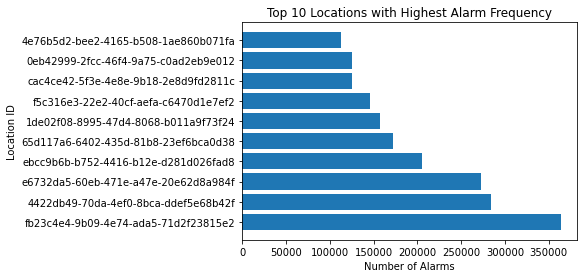

In [14]:
# Count the number of occurrences of each locationid using locationid as index
alarm_counts = df.groupby('locationid')['AssetId'].count()

# The first 10 in descending order according to the number of alarms
top_10 = alarm_counts.sort_values(ascending=False).head(10)

# Draw bar graphs
plt.barh(top_10.index, top_10.values)

plt.title('Top 10 Locations with Highest Alarm Frequency')
plt.xlabel('Number of Alarms')
plt.ylabel('Location ID')

plt.show()

***Question 2: What are the differences in alarm frequencies for different device types?***

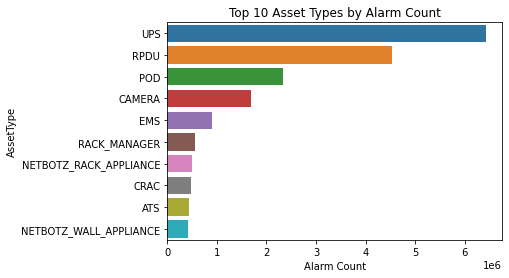

In [17]:
import seaborn as sns
asset_counts = df['AssetType'].value_counts().sort_values(ascending=False)
top_asset_counts = asset_counts[:10]
sns.barplot(x=top_asset_counts.values, y=top_asset_counts.index)
plt.xlabel('Alarm Count')
plt.ylabel('AssetType')
plt.title('Top 10 Asset Types by Alarm Count')
plt.show()

***Question 3: What is the distribution of alarm severities?***

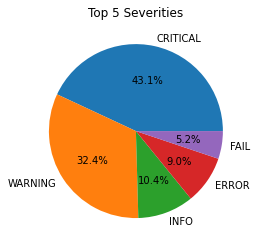

In [22]:
# Calculate the number of different alarm levels
severity_counts = df['Severity'].value_counts().head(5)

# Draw the pie chart
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%')
plt.title('Top 5 Severities')
plt.show()

***Question 4: Top 5 Alarm Labels by Count***

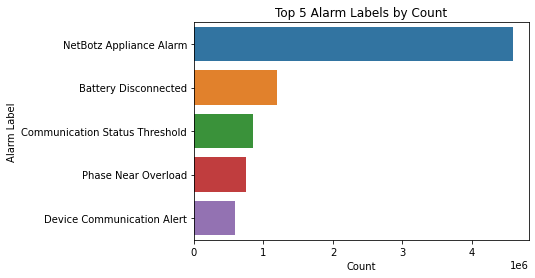

In [32]:
import seaborn as sns

alarmlabel_counts = df['AlarmLabel'].value_counts().head(5)
data1 = pd.DataFrame({'Alarm Label': alarm_counts.index, 'Count': alarm_counts.values})
sns.barplot(x='Count', y='Alarm Label', data=data1)

plt.title('Top 5 Alarm Labels by Count')
plt.xlabel('Count')
plt.ylabel('Alarm Label')

plt.show()

***Question 5: Top 5 Organization Country Codes by Count***

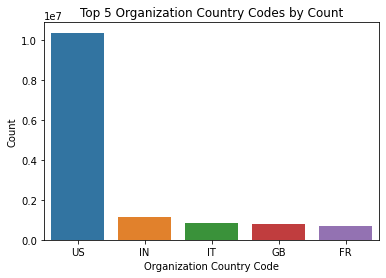

In [34]:
country_counts = df['organizationcountrycode'].value_counts().head(5)
data2 = pd.DataFrame({'Organization Country Code': country_counts.index, 'Count': country_counts.values})
sns.barplot(x='Organization Country Code', y='Count', data=data2)

plt.title('Top 5 Organization Country Codes by Count')
plt.xlabel('Organization Country Code')
plt.ylabel('Count')

plt.show()

***Question 6: Average Alarm Duration for Top 10 AlarmLabel***

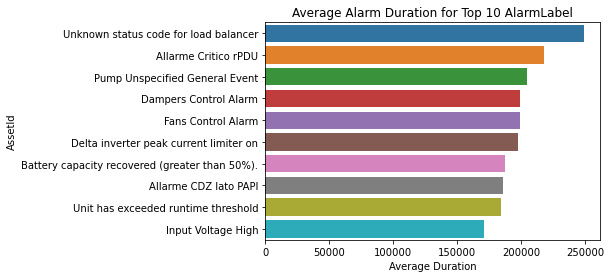

In [41]:
df['Duration'] = (df['ClearedTimestamp'] - df['ActivatedTimestamp']).dt.total_seconds()/60
# Group by device and calculate the average alarm duration for each device
average_duration_alarmlabel = df.groupby('AlarmLabel')['Duration'].mean()

# Select the average alarm duration of the first 5 devices
top_10_average_durations = average_duration_alarmlabel.nlargest(10)

# Convert results to a DataFrame for bar charting
data3 = top_10_average_durations.reset_index(name='Average Duration')

# Use barplot to draw bar graphs
sns.barplot(x='Average Duration', y='AlarmLabel', data=data3)

# Set up the title and labels
plt.title('Average Alarm Duration for Top 10 AlarmLabel')
plt.xlabel('Average Duration')
plt.ylabel('AssetId')

plt.show()

***Question 7: What is the relationship between the number of alarms and the number of weeks?***

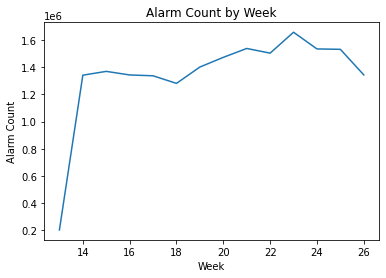

In [38]:
week_counts = df['week'].value_counts().sort_index()
data4 = pd.DataFrame({'Week': week_counts.index, 'Count': week_counts.values})
plt.plot(data4['Week'], data4['Count'])
plt.xlabel('Week')
plt.ylabel('Alarm Count')
plt.title('Alarm Count by Week')
plt.show()

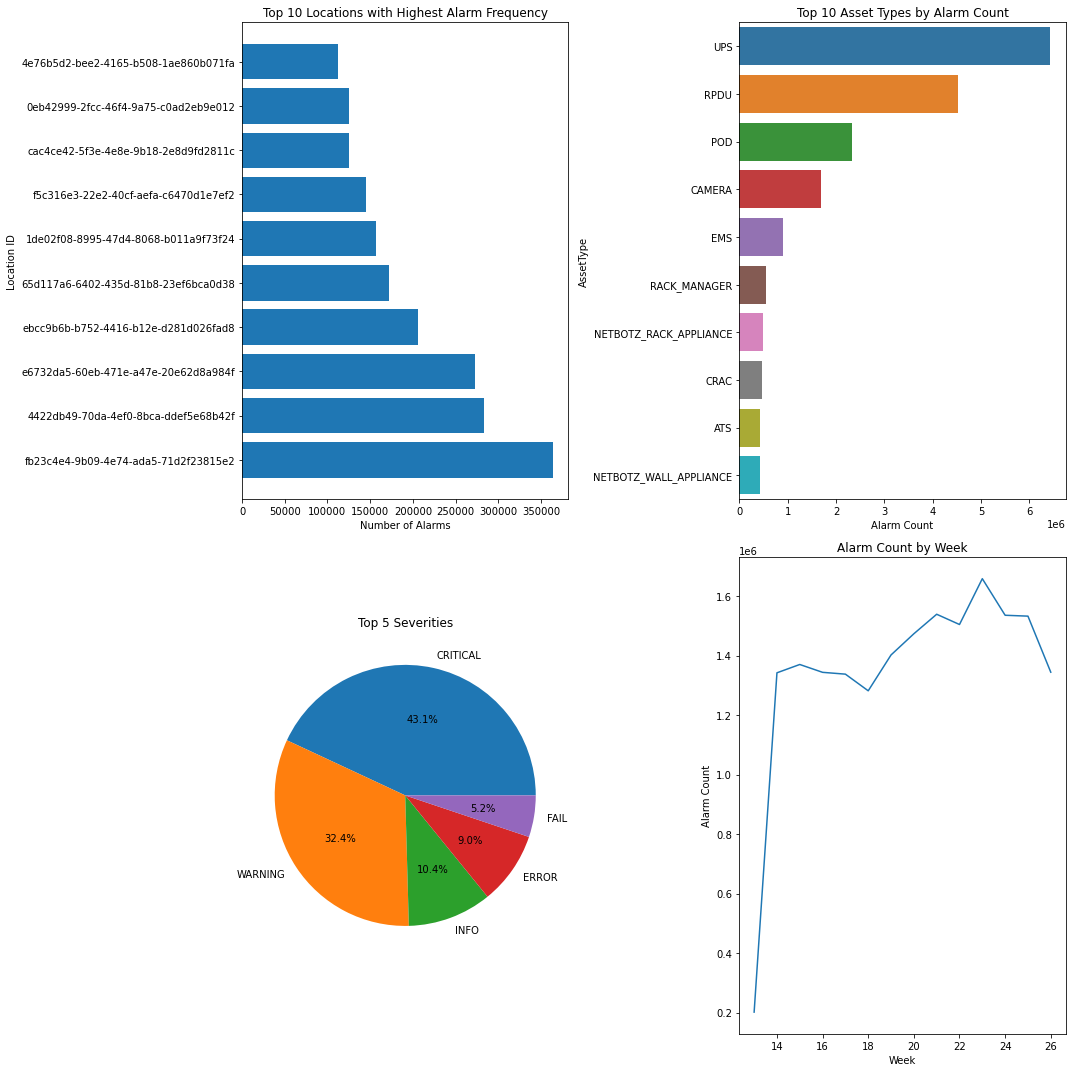

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 创建 2x2 子图布局
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# plot 1
alarm_counts = df.groupby('locationid')['AssetId'].count()
top_10 = alarm_counts.sort_values(ascending=False).head(10)
axs[0, 0].barh(top_10.index, top_10.values)
axs[0, 0].set_title('Top 10 Locations with Highest Alarm Frequency')
axs[0, 0].set_xlabel('Number of Alarms')
axs[0, 0].set_ylabel('Location ID')

# plot 2
asset_counts = df['AssetType'].value_counts().sort_values(ascending=False)
top_asset_counts = asset_counts[:10]
sns.barplot(x=top_asset_counts.values, y=top_asset_counts.index, ax=axs[0, 1])
axs[0, 1].set_xlabel('Alarm Count')
axs[0, 1].set_ylabel('AssetType')
axs[0, 1].set_title('Top 10 Asset Types by Alarm Count')

# plot 3
severity_counts = df['Severity'].value_counts().head(5)
axs[1, 0].pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%')
axs[1, 0].set_title('Top 5 Severities')

# plot 4
week_counts = df['week'].value_counts().sort_index()
data4 = pd.DataFrame({'Week': week_counts.index, 'Count': week_counts.values})
axs[1, 1].plot(data4['Week'], data4['Count'])
axs[1, 1].set_xlabel('Week')
axs[1, 1].set_ylabel('Alarm Count')
axs[1, 1].set_title('Alarm Count by Week')

# 显示图形
plt.tight_layout()
plt.show()

In [50]:
pip install ipywidgets seaborn

Note: you may need to restart the kernel to use updated packages.


## Time-series prediction

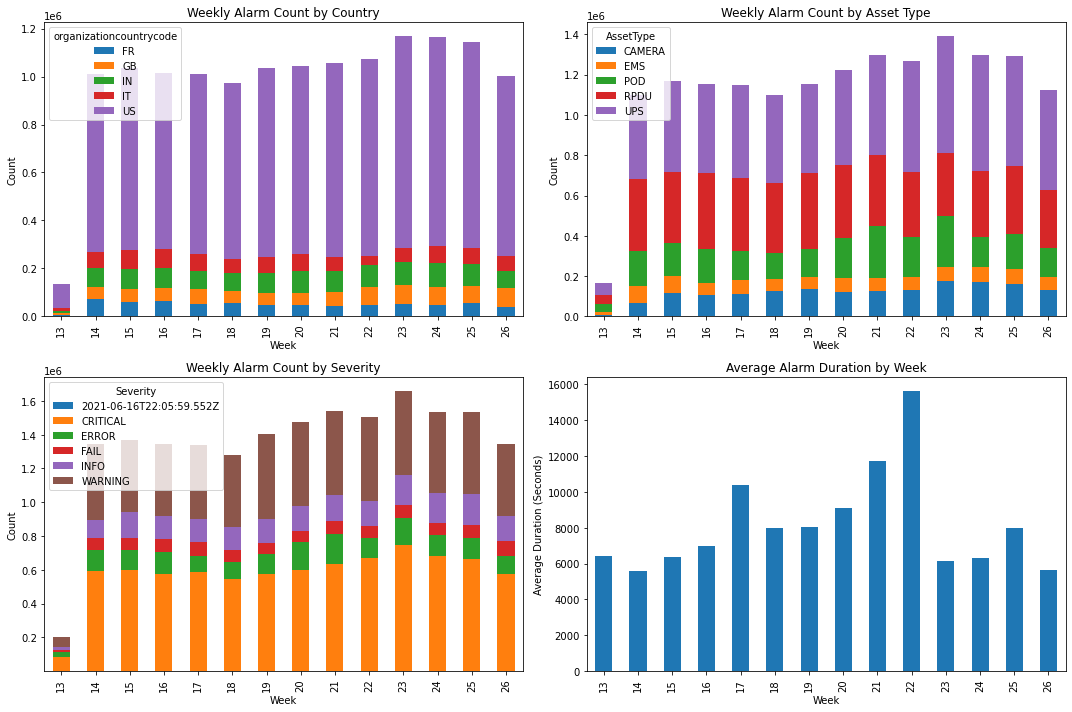

In [53]:
# 获取各个国家和资产类型的报警数量
country_counts = df['organizationcountrycode'].value_counts()
asset_type_counts = df['AssetType'].value_counts()

# 只保留数量前5的国家和资产类型
top_countries = country_counts.index[:5]
top_asset_types = asset_type_counts.index[:5]

df_top_countries = df[df['organizationcountrycode'].isin(top_countries)]
df_top_asset_types = df[df['AssetType'].isin(top_asset_types)]

# 创建一个新的figure，并设置大小
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# 在第一个子图中绘制每一周，每个国家报警数量的堆叠图
df_top_countries.groupby(['week', 'organizationcountrycode']).size().unstack().plot(kind='bar', stacked=True, ax=axs[0, 0])
axs[0, 0].set_title('Weekly Alarm Count by Country')
axs[0, 0].set_xlabel('Week')
axs[0, 0].set_ylabel('Count')

# 在第二个子图中绘制每一周，每个asset type报警数量的堆叠图
df_top_asset_types.groupby(['week', 'AssetType']).size().unstack().plot(kind='bar', stacked=True, ax=axs[0, 1])
axs[0, 1].set_title('Weekly Alarm Count by Asset Type')
axs[0, 1].set_xlabel('Week')
axs[0, 1].set_ylabel('Count')

# 在第三个子图中绘制每一周，每个severity数量的堆叠图
df.groupby(['week', 'Severity']).size().unstack().plot(kind='bar', stacked=True, ax=axs[1, 0])
axs[1, 0].set_title('Weekly Alarm Count by Severity')
axs[1, 0].set_xlabel('Week')
axs[1, 0].set_ylabel('Count')

# 在第四个子图中绘制每一周，平均报警时长的柱状图
df.groupby('week')['TimeDifferenceInSeconds'].mean().plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Average Alarm Duration by Week')
axs[1, 1].set_xlabel('Week')
axs[1, 1].set_ylabel('Average Duration (Seconds)')

# 显示图形
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd

# 将日期设为索引
df_time = df.set_index('ActivatedTimestamp')

# Filter rows where 'organizationcountrycode' is 'US'
df_us = df_time[df_time['organizationcountrycode'] == 'US']

# Resample and count the number of daily alarms in the US
daily_alarms_us = df_us.resample('D').size()

In [8]:
daily_alarms_us

ActivatedTimestamp
2021-04-01 00:00:00+00:00    102462
2021-04-02 00:00:00+00:00    122534
2021-04-03 00:00:00+00:00    105410
2021-04-04 00:00:00+00:00     95066
2021-04-05 00:00:00+00:00    106902
                              ...  
2021-06-26 00:00:00+00:00    119899
2021-06-27 00:00:00+00:00    124485
2021-06-28 00:00:00+00:00    123335
2021-06-29 00:00:00+00:00    126393
2021-06-30 00:00:00+00:00    127319
Freq: D, Length: 91, dtype: int64

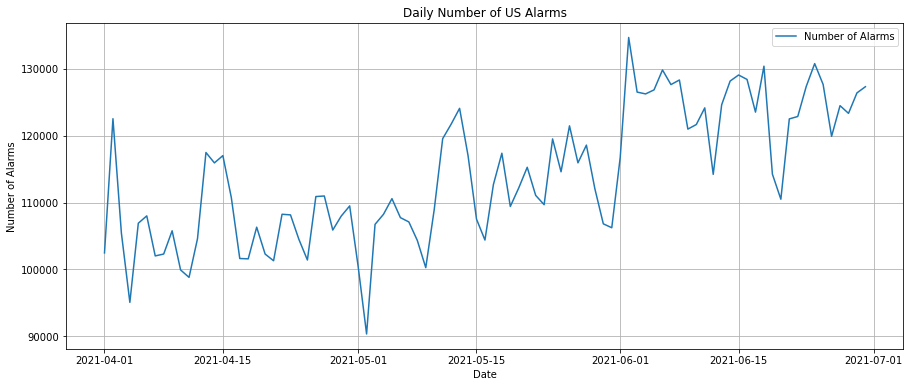

In [9]:
import matplotlib.pyplot as plt

# 确保在jupyter notebook中可以显示图形
%matplotlib inline 

# 绘制图像
plt.figure(figsize=(15,6))
plt.plot(daily_alarms_us, label='Number of Alarms')
plt.title('Daily Number of US Alarms')
plt.xlabel('Date')
plt.ylabel('Number of Alarms')
plt.legend(loc='best')
plt.grid(True)
plt.show()

/Users/LBJ/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Exponential Smoothing RMSE: 6430.087428200644


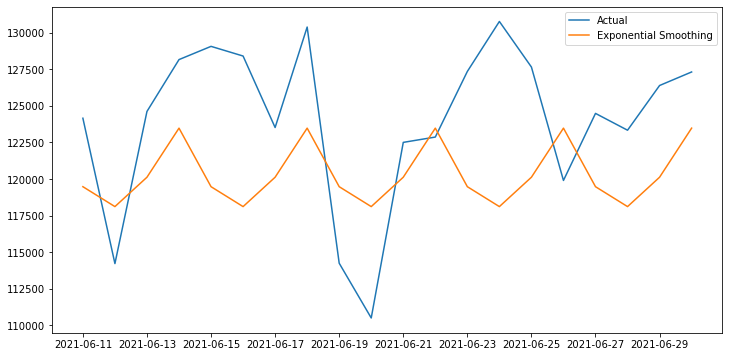

In [22]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

# Split the data into training and testing sets
train = daily_alarms_us[:-20]  # Use all but the last 20 days for training
test = daily_alarms_us[-20:]  # Use the last 20 days for testing

# Fit an Exponential Smoothing model
exp_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=4)
exp_model_fit = exp_model.fit()
exp_forecast = exp_model_fit.forecast(steps=20)

# Calculate RMSE for model
exp_rmse = sqrt(mean_squared_error(test, exp_forecast))

print(f'Exponential Smoothing RMSE: {exp_rmse}')

# Plot actual values vs. forecasts
plt.figure(figsize=(12,6))
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, exp_forecast, label='Exponential Smoothing')
plt.legend()
plt.show()


In [14]:
from itertools import product

# Define the parameter grid
trend_params = ['add', 'mul']
seasonal_params = ['add', 'mul']
seasonal_periods_params = range(2, 10)

# Initialize the best parameters and the best RMSE
best_params = (None, None, None)
best_rmse = float('inf')

# Perform grid search
for trend, seasonal, seasonal_periods in product(trend_params, seasonal_params, seasonal_periods_params):
    try:
        # Fit the model
        exp_model = ExponentialSmoothing(train, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
        exp_model_fit = exp_model.fit()

        # Make predictions
        exp_forecast = exp_model_fit.forecast(steps=20)

        # Calculate RMSE
        exp_rmse = sqrt(mean_squared_error(test, exp_forecast))

        # Update the best parameters and the best RMSE if the current RMSE is lower
        if exp_rmse < best_rmse:
            best_params = (trend, seasonal, seasonal_periods)
            best_rmse = exp_rmse
    except:
        continue

print(f'Best parameters: {best_params}')
print(f'Best RMSE: {best_rmse}')

/Users/LBJ/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/LBJ/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/LBJ/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/LBJ/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/LBJ/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/LBJ/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters

Best parameters: ('add', 'add', 7)
Best RMSE: 4733.394639785113


/Users/LBJ/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/LBJ/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/LBJ/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


/Users/LBJ/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


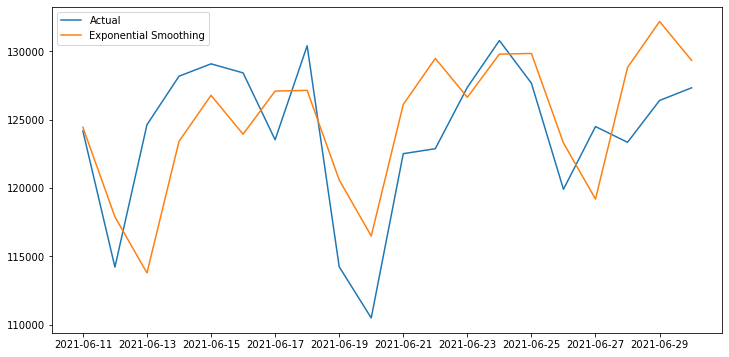

In [15]:
# Fit the model with the best parameters
exp_model = ExponentialSmoothing(train, trend=best_params[0], seasonal=best_params[1], seasonal_periods=best_params[2])
exp_model_fit = exp_model.fit()

# Make predictions
exp_forecast = exp_model_fit.forecast(steps=20)

# Plot actual values vs. forecasts
plt.figure(figsize=(12,6))
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, exp_forecast, label='Exponential Smoothing')
plt.legend()
plt.show()

/Users/LBJ/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


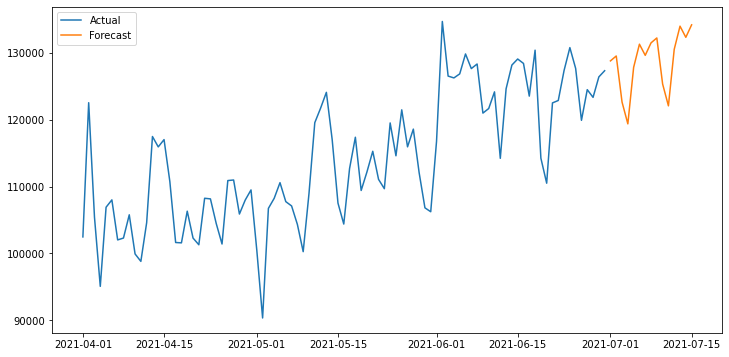

In [19]:
# Fit the model with the best parameters on the entire dataset
exp_model = ExponentialSmoothing(daily_alarms_us, trend=best_params[0], seasonal=best_params[1], seasonal_periods=best_params[2])
exp_model_fit = exp_model.fit()

# Make predictions for the next month
next_month_forecast = exp_model_fit.forecast(steps=15)

# Plot the actual values and the forecasts
plt.figure(figsize=(12,6))
plt.plot(daily_alarms_us.index, daily_alarms_us.values, label='Actual')
plt.plot(pd.date_range(start=daily_alarms_us.index[-1], periods=16)[1:], next_month_forecast, label='Forecast')
plt.legend()
plt.show()

In [23]:
# Create a date range for the next 15 days
forecast_dates = pd.date_range(start=daily_alarms_us.index[-1], periods=16)[1:]

# Create a DataFrame with the forecast dates and the forecast values
forecast_df = pd.DataFrame(data={'Date': forecast_dates, 'Forecast': next_month_forecast})

# Set the date as the index
forecast_df = forecast_df.set_index('Date')

forecast_df

,Forecast
Date,
2021-07-01 00:00:00+00:00,128787.400263
2021-07-02 00:00:00+00:00,129523.053600
2021-07-03 00:00:00+00:00,122628.368205
2021-07-04 00:00:00+00:00,119368.681089
2021-07-05 00:00:00+00:00,127821.005927
...,...
2021-07-11 00:00:00+00:00,122065.928770
2021-07-12 00:00:00+00:00,130518.253609
2021-07-13 00:00:00+00:00,133983.338621


### Conclusion

总结：

我们使用了时间序列分析的方法，对美国的日报警数量进行了预测。我们首先对数据进行了预处理，然后使用指数平滑模型进行了预测。在优化之前，指数平滑模型的RMSE为6430.09。这意味着这个模型的预测值与实际值之间的平均差距分别约为6430个报警数量。在进行参数优化后，指数平滑模型的RMSE降低到了4733.39。这表示预测值与实际值之间的平均差距约为4733个报警数量，比优化前的模型要低。这个结果表明，参数优化显著提高了模型的预测性能。具体来说，优化后的指数平滑模型的预测误差比优化前的指数平滑模型低了约26%（(6430.09-4733.39)/6430.09）。然后，我们使用这个优化后的模型预测了未来一个月的报警数量，并将预测结果进行了可视化。

用处：

这个时间序列预测模型对于预测和管理未来的报警数量非常有用。通过预测未来的报警数量，我们可以更好地理解和预测系统的行为，从而提前做好准备，例如提前安排维护人员、提前购买必要的设备等。

此外，这个模型还可以帮助我们理解报警数量的趋势和季节性模式，这对于理解系统的行为和性能也非常有用。例如，如果我们发现报警数量在某个特定的季节或时间段内显著增加，我们就可以进一步研究并解决可能的问题。

总的来说，这个时间序列预测模型是一个强大的工具，可以帮助我们更好地理解、预测和管理系统的报警数量。

# Clustering

1.Text mining

6个月数据
地区：US
unique alarm message

In [8]:
csv_files_13 = glob.glob('/Users/LBJ/Desktop/6080_Data/M1-3/*.csv')

df_13 = pd.DataFrame()
for file in csv_files_13:
    data = pd.read_csv(file)
    df_13 = df_13.append(data, ignore_index=True)

merged_df = pd.concat([df1, df_13])

/var/folders/cd/c6l6k8q13qd_5vxs3_m7jkpr0000gp/T/ipykernel_29162/1166396771.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_13 = df_13.append(data, ignore_index=True)
/var/folders/cd/c6l6k8q13qd_5vxs3_m7jkpr0000gp/T/ipykernel_29162/1166396771.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_13 = df_13.append(data, ignore_index=True)
/var/folders/cd/c6l6k8q13qd_5vxs3_m7jkpr0000gp/T/ipykernel_29162/1166396771.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)
/var/folders/cd/c6l6k8q13qd_5vxs3_m7jkpr0000gp/T/ipykernel_29162/1166396771.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_13 = df_13.append(data, ignore_index=True)


In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34587087 entries, 0 to 15716809
Data columns (total 12 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   AssetId                  object 
 1   organizationid           object 
 2   organizationcountrycode  object 
 3   locationid               object 
 4   AssetType                object 
 5   AlarmLabel               object 
 6   AlarmMessage             object 
 7   Severity                 object 
 8   ActivatedTimestamp       object 
 9   ClearedTimestamp         object 
 10  month                    float64
 11  week                     float64
dtypes: float64(2), object(10)
memory usage: 3.4+ GB


In [13]:
# 根据条件过滤数据
filtered_df = merged_df[merged_df['organizationcountrycode'] == 'US']

# 对过滤后的数据进行分组采样
df16 = filtered_df.groupby('AlarmMessage').apply(lambda x: x.sample(1)).reset_index(drop=True)

df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17865 entries, 0 to 17864
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AssetId                  17865 non-null  object 
 1   organizationid           17865 non-null  object 
 2   organizationcountrycode  17865 non-null  object 
 3   locationid               8761 non-null   object 
 4   AssetType                17865 non-null  object 
 5   AlarmLabel               17865 non-null  object 
 6   AlarmMessage             17865 non-null  object 
 7   Severity                 17865 non-null  object 
 8   ActivatedTimestamp       17865 non-null  object 
 9   ClearedTimestamp         17865 non-null  object 
 10  month                    17865 non-null  float64
 11  week                     17865 non-null  float64
dtypes: float64(2), object(10)
memory usage: 1.6+ MB


In [15]:
df16['ActivatedTimestamp'] = pd.to_datetime(df16['ActivatedTimestamp'], utc=True)
df16['ClearedTimestamp'] = pd.to_datetime(df16['ClearedTimestamp'], utc=True)
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17865 entries, 0 to 17864
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   AssetId                  17865 non-null  object             
 1   organizationid           17865 non-null  object             
 2   organizationcountrycode  17865 non-null  object             
 3   locationid               8761 non-null   object             
 4   AssetType                17865 non-null  object             
 5   AlarmLabel               17865 non-null  object             
 6   AlarmMessage             17865 non-null  object             
 7   Severity                 17865 non-null  object             
 8   ActivatedTimestamp       17865 non-null  datetime64[ns, UTC]
 9   ClearedTimestamp         17865 non-null  datetime64[ns, UTC]
 10  month                    17865 non-null  float64            
 11  week                     178

In [16]:
import re
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

def clean_sentence(sentence):
    # Remove unwanted characters
    tokens = [re.sub(r'[^\w\s]|_', '', token) for token in sentence]

    # Remove extra spaces
    cleaned_tokens = [re.sub(r'\s+', ' ', token) for token in tokens]

    # Convert to lowercase
    cleaned_tokens = [token.lower() for token in cleaned_tokens]

    return cleaned_tokens

def clean_column(data, column_name):
    # Create a new column name for the cleaned sentences
    cleaned_column_name = f"Cleaned {column_name}"

    # Iterate over each row in the specified column
    cleaned_sentences = []
    for index, row in data.iterrows():
        sentence = row[column_name]
        tokens = word_tokenize(sentence)
        cleaned_tokens = clean_sentence(tokens)
        cleaned_sentence = ' '.join(cleaned_tokens)
        cleaned_sentences.append(cleaned_sentence)

    # Add the cleaned sentences as a new column in the dataframe
    data[cleaned_column_name] = cleaned_sentences

    return data

# Download the required NLTK resource (punkt tokenizer)
nltk.download('punkt')

# Specify the column name containing the alarm messages
column_name = "AlarmMessage"

# Clean the specified column and add a new column with the cleaned sentences
split_1 = clean_column(df16, column_name)

[nltk_data] Downloading package punkt to /Users/LBJ/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
# performing Bag-of-Words vectorization using the scikit-learn library

from sklearn.feature_extraction.text import CountVectorizer

# Initialize the vectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer to the text column
vectorizer.fit(split_1['Cleaned AlarmMessage'])

# Transform the text column into a BoW matrix
bow_matrix = vectorizer.transform(split_1['Cleaned AlarmMessage'])

print(bow_matrix)
print(bow_matrix.shape)

  (0, 3086)	1
  (0, 3537)	1
  (0, 4139)	1
  (0, 5272)	1
  (1, 2986)	1
  (1, 3611)	1
  (1, 3742)	1
  (1, 4001)	2
  (1, 4297)	1
  (1, 4701)	1
  (1, 4705)	1
  (1, 5938)	1
  (1, 5940)	2
  (2, 2986)	1
  (2, 3611)	1
  (2, 3742)	1
  (2, 4001)	2
  (2, 4297)	1
  (2, 4474)	1
  (2, 4701)	1
  (2, 4705)	1
  (2, 4706)	1
  (2, 5938)	1
  (2, 5940)	2
  (3, 256)	1
  :	:
  (17858, 4467)	1
  (17858, 4598)	1
  (17858, 4772)	2
  (17858, 4960)	2
  (17858, 5785)	1
  (17858, 5940)	1
  (17859, 4297)	1
  (17859, 4759)	1
  (17859, 4928)	1
  (17859, 5815)	1
  (17859, 5828)	1
  (17860, 4297)	1
  (17860, 4772)	1
  (17860, 4928)	1
  (17860, 5815)	1
  (17860, 5828)	1
  (17861, 3086)	1
  (17861, 3537)	1
  (17861, 6064)	1
  (17862, 3086)	1
  (17862, 4974)	1
  (17862, 6064)	1
  (17864, 4297)	1
  (17864, 4772)	1
  (17864, 5815)	1
(17865, 6330)


In [18]:
#perform TF-IDF vectorization using the scikit-learn library (Term Frequency-Inverse Document Frequency)

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the text column
vectorizer.fit(split_1['Cleaned AlarmMessage'])

# Transform the text column into a TF-IDF matrix
tfidf_matrix = vectorizer.transform(split_1['Cleaned AlarmMessage'])

In [19]:
print(tfidf_matrix.shape)

(17865, 6330)


In [20]:
print(tfidf_matrix)

  (0, 5272)	0.3526873169288379
  (0, 4139)	0.5684455697558429
  (0, 3537)	0.436534210894884
  (0, 3086)	0.6015971853498598
  (1, 5940)	0.170765250449801
  (1, 5938)	0.3109647164524959
  (1, 4705)	0.1618501768115306
  (1, 4701)	0.37875028950529
  (1, 4297)	0.09083966015845928
  (1, 4001)	0.5829298000630879
  (1, 3742)	0.26368608906461627
  (1, 3611)	0.37875028950529
  (1, 2986)	0.37875028950529
  (2, 5940)	0.16770708975364862
  (2, 5938)	0.30539578441720017
  (2, 4706)	0.1326490704490284
  (2, 4705)	0.15895167229678542
  (2, 4701)	0.37196741508575515
  (2, 4474)	0.13379326836316507
  (2, 4297)	0.08921285214209353
  (2, 4001)	0.572490363477054
  (2, 3742)	0.2589638494311108
  (2, 3611)	0.37196741508575515
  (2, 2986)	0.37196741508575515
  (3, 5815)	0.505898210634568
  :	:
  (17858, 4467)	0.20866294610458405
  (17858, 4442)	0.3662396911906522
  (17858, 4434)	0.20904943089074549
  (17858, 4297)	0.10443847494689257
  (17858, 4151)	0.4536666697107485
  (17858, 3866)	0.20943926916597333
  (17

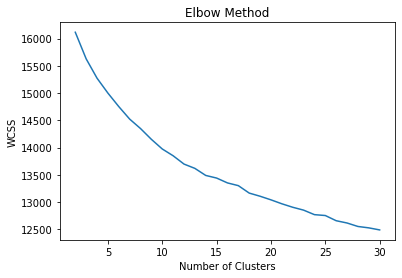

In [21]:
# using elbow method to find the optimum number of clusters

import seaborn as sns
from sklearn.cluster import KMeans

wcss = []  # Initialize an empty list to store the within-cluster sum of squares (WCSS) values

# Iterate over different numbers of clusters
for k in range(2, 31):
    kmeans = KMeans(n_clusters=k, n_init=30)  # Initialize the K-means clustering algorithm with the current number of clusters
    kmeans.fit(tfidf_matrix)  # Fit the K-means model to the TF-IDF matrix
    wcss.append(kmeans.inertia_)  # Append the WCSS value to the list

# Plotting the WCSS values against the number of clusters
sns.lineplot(x=range(2, 31), y=wcss)  # Create a line plot using seaborn
plt.xlabel('Number of Clusters')  # Set the label for the x-axis
plt.ylabel('WCSS')  # Set the label for the y-axis
plt.title('Elbow Method')  # Set the title of the plot
plt.show()  # Display the plot

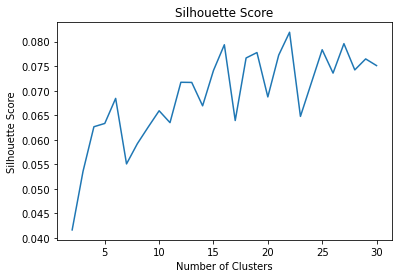

In [23]:
#using Silhouette Score to find the optimum number of clusters

import seaborn as sns
from sklearn.metrics import silhouette_score

silhouette_scores = []  # Initialize an empty list to store the silhouette scores

# Iterate over different numbers of clusters
for k in range(2, 31):
    kmeans = KMeans(n_clusters=k,n_init=30)  # Initialize the K-means clustering algorithm with the current number of clusters
    kmeans.fit(tfidf_matrix)  # Fit the K-means model to the TF-IDF matrix
    labels = kmeans.labels_  # Get the cluster labels for each data point
    score = silhouette_score(tfidf_matrix, labels)  # Calculate the silhouette score
    silhouette_scores.append(score)  # Append the silhouette score to the list

# Plotting the silhouette scores against the number of clusters
plt.plot(range(2, 31), silhouette_scores)  # Create a line plot of the silhouette scores
plt.xlabel('Number of Clusters')  # Set the label for the x-axis
plt.ylabel('Silhouette Score')  # Set the label for the y-axis
plt.title('Silhouette Score')  # Set the title of the plot
plt.show()  # Display the plot


In [ ]:
#use pre-trained Word2Vec or GloVe embeddings to obtain word vectors for the text column in our dataset

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pandas as pd

mgdf3 = pd.read_csv(r'C:\Users\RAHUL REDDY TADURI\cleaned_split_0001.csv')

# Load pre-trained Word2Vec or GloVe embeddings
word2vec_model = Word2Vec.load(r'C:\Users\RAHUL REDDY TADURI\anaconda3')

# or
# word2vec_model = KeyedVectors.load_word2vec_format('path_to_word2vec_file')


# Tokenize the text column (assuming it contains sentences)
tokenized_data = [sentence.split() for sentence in split_1['Cleaned AlarmMessage']]

# Initialize an empty list to store the word vectors
word_vectors = []

# Iterate over each sentence in the tokenized data
for sentence in tokenized_data:
    vectors = []
    # Iterate over each word in the sentence and check if it is in the vocabulary
    for word in sentence:
        if word in word2vec_model.wv.vocab:
            vectors.append(word2vec_model[word])
    word_vectors.append(vectors)
# xxxxxxxxxxxxxxxxxxxx

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Determine the number of clusters (example: using elbow method)
# ... (code to determine the number of clusters)

# Apply K-means clustering
num_clusters = 16  # Replace with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters,n_init=10)
kmeans.fit(tfidf_matrix)

# Assign cluster labels to the data
cluster_labels = kmeans.labels_

# Analyze the clusters
split_1['Cluster_Labels'] = cluster_labels

# Explore the clusters
for cluster in range(num_clusters):
    cluster_data = split_1[split_1['Cluster_Labels'] == cluster]
    print(f"Cluster {cluster}:\n")
    print(cluster_data['AlarmMessage'])
    print("---------------------------------------")

# Evaluate the clustering (example: Silhouette score)
# ... (code to evaluate the clustering using silhouette score)

# Visualization (example: dimensionality reduction with PCA and scatter plot)
# ... (code for visualizing the clusters)


Cluster 0:

12645                        The UPS \"redact\" of 2 days.
13068    The current value of 'redact' (-9 °C) is too h...
13081    The current value of 'redact' (0.0 min) is too...
13096       The current value of 'redact' (1) is too high.
13101    The current value of 'redact' (1.2°F / -17.1°C...
                               ...                        
16006    The current value of 'redact' (98.1 Â°F) is to...
16007    The current value of 'redact' (98.2 Â°F) is to...
16009    The current value of 'redact' (99 %) is too high.
16014    The current value of 'redact' (999 %) is too h...
16015     The current value of 'redact' (N/A) is too high.
Name: AlarmMessage, Length: 2080, dtype: object
---------------------------------------
Cluster 1:

719      A high temperature threshold violation exists ...
1340     A minimum humidity threshold violation exists ...
1341     A minimum humidity threshold violation exists ...
1448       A rack inlet high temperature violation exists.
583

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a document-term matrix
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(split_1['AlarmMessage'])

# Apply LDA
num_topics = 16  # Number of topics to identify
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

# Get the most probable words for each topic
feature_names = vectorizer.get_feature_names()
num_top_words = 5  # Number of top words to consider
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
    topic_label = f"Topic {topic_idx}"
    
    print(topic_label + ":")
    print(", ".join(top_words))
    print("---------------------------------------")


Topic 0:
of, the, redact, is, current
---------------------------------------
Topic 1:
temperature, violation, threshold, for, at
---------------------------------------
Topic 2:
too, redact, the, been, value
---------------------------------------
Topic 3:
exists, condition, no, longer, on
---------------------------------------
Topic 4:
normal, state, to, returned, has
---------------------------------------
Topic 5:
the, voltage, at, is, battery
---------------------------------------
Topic 6:
battery, on, the, is, enclosure
---------------------------------------
Topic 7:
redact, door, location, name, action
---------------------------------------
Topic 8:
is, alarm, inactive, unknown, 15
---------------------------------------
Topic 9:
at, for, of, rate, term
---------------------------------------
Topic 10:
rack, violation, for, threshold, pdu
---------------------------------------
Topic 11:
sensor, at, for, door, nbrk0750
---------------------------------------
Topic 12:
exists

/Users/LBJ/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


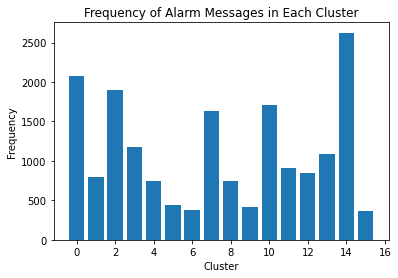

In [26]:
import matplotlib.pyplot as plt

# Count the number of alarm messages in each cluster
cluster_counts = split_1['Cluster_Labels'].value_counts().sort_index()

# Plot the cluster frequencies
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Frequency of Alarm Messages in Each Cluster')
plt.show()

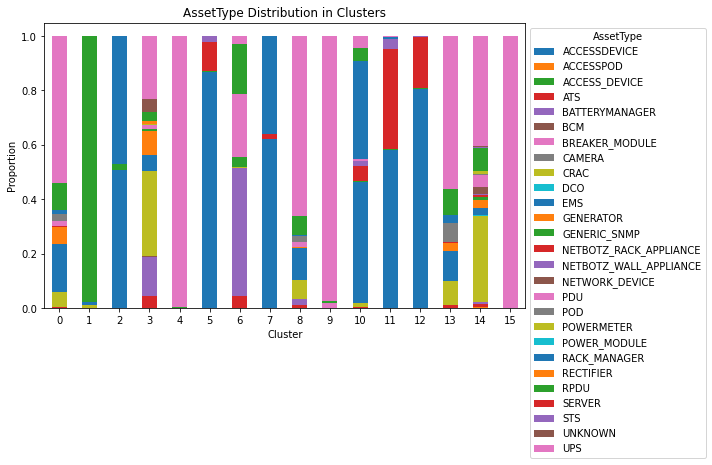

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame called 'split_1' with 'Cluster_Labels' and 'AssetType' columns

# Count the occurrences of each AssetType in each cluster
cluster_asset_counts = split_1.groupby(['Cluster_Labels', 'AssetType']).size().unstack()

# Normalize the counts to create proportions
cluster_asset_proportions = cluster_asset_counts.div(cluster_asset_counts.sum(axis=1), axis=0)

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
cluster_asset_proportions.plot(kind='bar', stacked=True, ax=ax)

# Customize the plot
ax.set_xlabel('Cluster')
ax.set_ylabel('Proportion')
ax.set_title('AssetType Distribution in Clusters')
plt.legend(title='AssetType', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


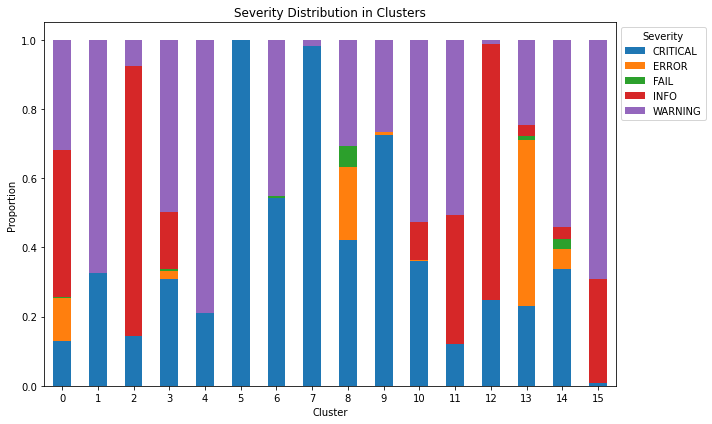

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame called 'split_1' with 'Cluster_Labels' and 'Severity' columns

# Count the occurrences of each Severity in each cluster
cluster_severity_counts = split_1.groupby(['Cluster_Labels', 'Severity']).size().unstack()

# Normalize the counts to create proportions
cluster_severity_proportions = cluster_severity_counts.div(cluster_severity_counts.sum(axis=1), axis=0)

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
cluster_severity_proportions.plot(kind='bar', stacked=True, ax=ax)

# Customize the plot
ax.set_xlabel('Cluster')
ax.set_ylabel('Proportion')
ax.set_title('Severity Distribution in Clusters')
plt.legend(title='Severity', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

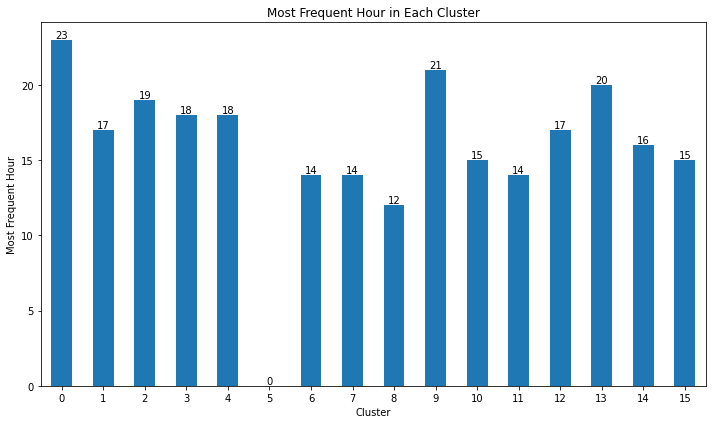

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'split_1' with 'Cluster_Labels' and 'ActivatedTimestamp' columns

# Extract the hour from the 'ActivatedTimestamp' column
split_1['Hour'] = split_1['ActivatedTimestamp'].dt.hour

# Group the data by 'Cluster_Labels' and 'Hour' and count the occurrences
cluster_hour_counts = split_1.groupby(['Cluster_Labels', 'Hour']).size().unstack()

# Find the most frequent hour for each cluster
most_frequent_hours = cluster_hour_counts.idxmax(axis=1)

# Plot the bar chart for the most frequent hours
fig, ax = plt.subplots(figsize=(10, 6))
most_frequent_hours.plot(kind='bar', ax=ax)

# Add the numerical values to the plot
for i, v in enumerate(most_frequent_hours):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Customize the plot
ax.set_xlabel('Cluster')
ax.set_ylabel('Most Frequent Hour')
ax.set_title('Most Frequent Hour in Each Cluster')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


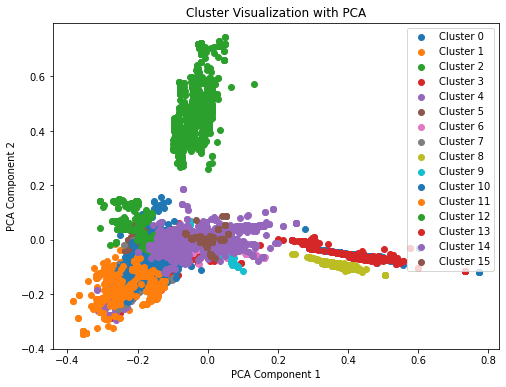

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Determine the number of clusters (example: using elbow method)
# ... (code to determine the number of clusters)

# Perform PCA dimensionality reduction
pca = PCA(n_components=2)  # Set the desired number of components
pca_features = pca.fit_transform(tfidf_matrix.toarray())  # Replace 'your_data' with the appropriate data

# Create scatter plot with legend
plt.figure(figsize=(8, 6))
for cluster in range(num_clusters):
    cluster_data = split_1[split_1['Cluster_Labels'] == cluster]
    plt.scatter(pca_features[cluster_data.index, 0], pca_features[cluster_data.index, 1], label=f"Cluster {cluster}")

plt.legend()
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Cluster Visualization with PCA")
plt.show()

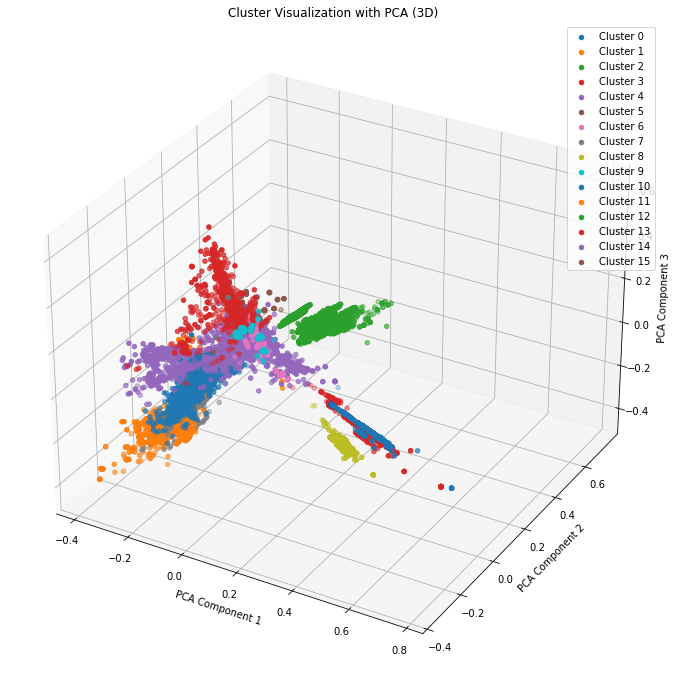

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Determine the number of clusters (example: using elbow method)
# ... (code to determine the number of clusters)

# Perform PCA dimensionality reduction
pca = PCA(n_components=3)  # Set the desired number of components to 3
pca_features = pca.fit_transform(tfidf_matrix.toarray())  # Replace 'your_data' with the appropriate data

# Create 3D scatter plot with legend
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D axes instance

for cluster in range(num_clusters):
    cluster_data = split_1[split_1['Cluster_Labels'] == cluster]
    ax.scatter(pca_features[cluster_data.index, 0], pca_features[cluster_data.index, 1], pca_features[cluster_data.index, 2], label=f"Cluster {cluster}")

ax.legend()
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("Cluster Visualization with PCA (3D)")

plt.show()

In [35]:
from sklearn.metrics import silhouette_score

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.07419621660051917


Based on the clustering results you provided, the following is a brief description and possible naming of each cluster:

Cluster 0:Temperature and humidity violation alarms

Description: Alarm messages involving temperature and humidity violations, including sensor reporting anomalies, threshold violations, etc.

Cluster 1:Device Indicator Alarms

Description: Alarm messages involving temperature or other indicators of different devices, including temperature abnormalities, overloads, etc.

Cluster 2:Status change alarms

Description: Alarm messages that contain various different states, such as disarmed, restored, monitoring normal, etc.

Cluster 3: Device operation alarm

Description: The alarm message contains information such as device name, location, etc. It may be an alarm about device operation, location change, etc.

Cluster 4: Rate of change violation alarm

Description: Alarm messages involving rate of change, including long-term or short-term rate of change violations.

### Next plan

**1.define the cluster name**

**2.optimize the clustering model，improve the Silhouette Score.**